# How long does it take to get a message if the inquiry gets requected? How long if it is certified?

Firstly, let's take a closer look into the data.

In [1]:
import pandas as pd

The data was read. The necessary columns are:
- case_status
- case_received_date
- decision_date

We'll look at each of them.

In [2]:
col_list = ["case_status", "case_received_date", "decision_date"]

visas_df = pd.read_csv("data/us_perm_visas.csv", usecols=col_list)

C:\Users\andre\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
visas_df.head()

,case_received_date,case_status,decision_date
0,NaN,Certified,2012-02-01
1,NaN,Denied,2011-12-21
2,NaN,Certified,2011-12-01
3,NaN,Certified,2011-12-01
4,NaN,Certified,2012-01-26


How much values do we have in the seperate columns?

case_received_date
239091/374362 64%
Filled: |███████████████████████████████-------------------| 63.9% Rows


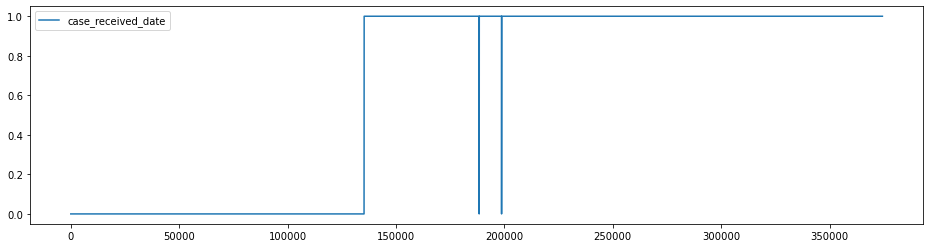


case_status
374362/374362 100%
Filled: |██████████████████████████████████████████████████| 100.0% Rows


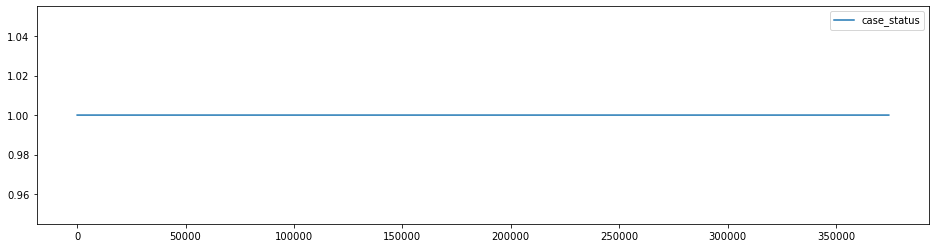


decision_date
374362/374362 100%
Filled: |██████████████████████████████████████████████████| 100.0% Rows


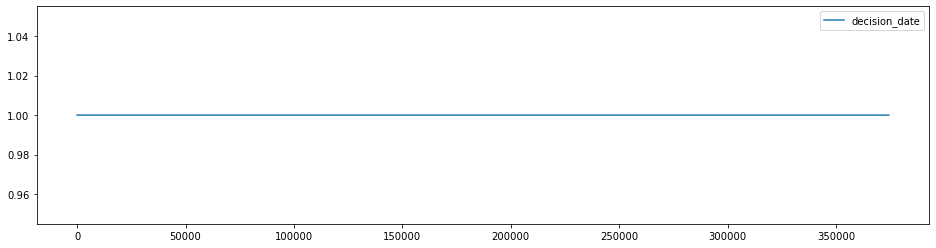

In [4]:
import modules
modules.print_count_of_values_relation(visas_df, True, True)

In [5]:
visas_df['case_received_date'].notna()

0         False
1         False
2         False
3         False
4         False
          ...  
374357     True
374358     True
374359     True
374360     True
374361     True
Name: case_received_date, Length: 374362, dtype: bool

<AxesSubplot:>

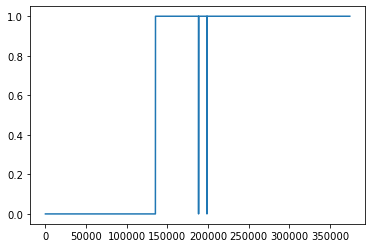

In [6]:
visas_df['case_received_date'].notna().astype(int).plot(x='index')

## case_status

The first column is case_status.

In [7]:
visas_df['case_status'].value_counts()

Certified            181933
Certified-Expired    148586
Denied                25649
Withdrawn             18194
Name: case_status, dtype: int64

Perfect. This column looks clean. There's no further work to do here.

## case_received_date

The next one is case_received_date.

In [8]:
visas_df['case_received_date'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: case_received_date, dtype: object

That doesn't look very good....

In [9]:
visas_df['case_received_date'].value_counts()


2014-06-30    767
2015-09-30    696
2015-06-30    695
2015-06-29    691
2016-06-29    670
             ... 
2011-08-15      1
2008-06-23      1
2012-11-15      1
2008-08-08      1
2012-11-06      1
Name: case_received_date, Length: 2180, dtype: int64

In [10]:
visas_df['case_received_date'] = pd.to_datetime(visas_df['case_received_date'])

In [11]:
visas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374362 entries, 0 to 374361
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   case_received_date  239091 non-null  datetime64[ns]
 1   case_status         374362 non-null  object        
 2   decision_date       374362 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 8.6+ MB


In [12]:
visas_df['case_received_date']

0               NaT
1               NaT
2               NaT
3               NaT
4               NaT
            ...    
374357   2016-12-29
374358   2016-12-30
374359   2016-12-30
374360   2016-12-30
374361   2016-12-30
Name: case_received_date, Length: 374362, dtype: datetime64[ns]

In [13]:
visas_df['case_received_date'].value_counts()

2014-06-30    767
2015-09-30    696
2015-06-30    695
2015-06-29    691
2016-06-29    670
             ... 
2011-12-07      1
2010-05-19      1
2009-05-06      1
2008-10-29      1
2010-07-14      1
Name: case_received_date, Length: 2180, dtype: int64

In [14]:
visas_df['case_received_date'].count()

239091